# Import libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Import dataset

In [21]:
df = pd.read_csv('C:\\Users\\Nithya\\Desktop\\Major project\\Dataset\\diabetes_012_health_indicators_BRFSS2015.csv')

# Data preprocessing

## Check data imbalance

In [22]:
print('Number of unique values present to identify diabetes')
print(df['Diabetes_012'].value_counts())

Number of unique values present to identify diabetes
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


## Data split

In [23]:
dfs = {}  # Dictionary to hold DataFrames

for i in range(3):
    dfs[f'df_{i}'] = df[df['Diabetes_012'] == i]

In [24]:
from sklearn.model_selection import train_test_split
train_df_0, test_df_0 = train_test_split(dfs['df_0'], test_size=0.2)
train_df_1, test_df_1 = train_test_split(dfs['df_1'], test_size=0.2)
train_df_2, test_df_2 = train_test_split(dfs['df_2'], test_size=0.2)

In [25]:
train_combined = pd.concat([train_df_0, train_df_1, train_df_2], ignore_index=True)
test_combined = pd.concat([test_df_0, test_df_1, test_df_2], ignore_index=True)

In [26]:
print(train_combined['Diabetes_012'].value_counts())

Diabetes_012
0.0    170962
2.0     28276
1.0      3704
Name: count, dtype: int64


In [27]:
print(test_combined['Diabetes_012'].value_counts())

Diabetes_012
0.0    42741
2.0     7070
1.0      927
Name: count, dtype: int64


# Smote oversampling

In [28]:
from imblearn.over_sampling import SMOTE
target_variable = 'Diabetes_012'


class_distribution = train_combined[target_variable].value_counts()
print("Class Distribution:")
print(class_distribution)



X = train_combined.drop(columns=[target_variable])
y = train_combined[target_variable]

desired_samples = {0: 170962, 1: 170962, 2: 170962}
smote = SMOTE(sampling_strategy=desired_samples, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_oversampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=[target_variable])], axis=1)

print("Oversampled Class Distribution:")
print(df_oversampled[target_variable].value_counts())

Class Distribution:
Diabetes_012
0.0    170962
2.0     28276
1.0      3704
Name: count, dtype: int64
Oversampled Class Distribution:
Diabetes_012
0.0    170962
1.0    170962
2.0    170962
Name: count, dtype: int64


# Logistic regression classification

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_resampled, y_resampled)

C:\Users\Nithya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

# Predict test result

In [30]:
X_test = test_combined.drop(columns=[target_variable])
y_test = test_combined[target_variable]

In [31]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

[[27702  6914  8125]
 [  261   262   404]
 [ 1346  1669  4055]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.65      0.77     42741
         1.0       0.03      0.28      0.05       927
         2.0       0.32      0.57      0.41      7070

    accuracy                           0.63     50738
   macro avg       0.43      0.50      0.41     50738
weighted avg       0.84      0.63      0.71     50738



# Data visualisation

Text(0.5, 1.0, 'Confusion Matrix')

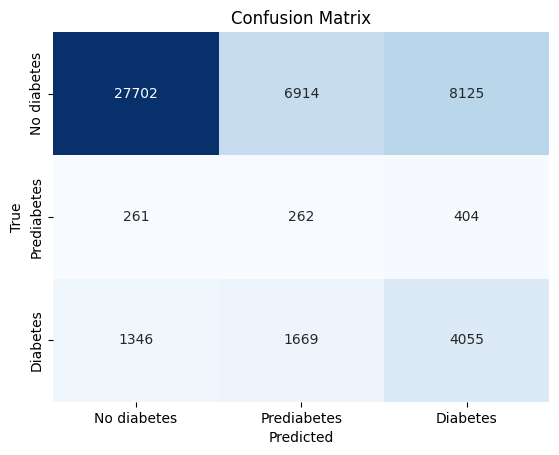

In [33]:
custom_labels = ['No diabetes', 'Prediabetes', 'Diabetes']
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Feature ranking

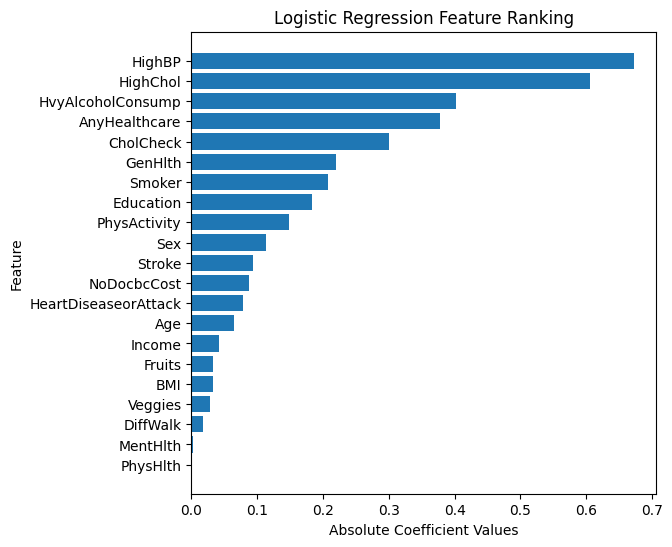

In [34]:
abs_coefs = np.abs(classifier.coef_[0])
sorted_idx = np.argsort(abs_coefs)

# Plot the feature importance
plt.figure(figsize=(6, 6))
plt.barh(range(len(sorted_idx)), abs_coefs[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X.columns.tolist()[i] for i in sorted_idx])
plt.xlabel('Absolute Coefficient Values')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Ranking')
plt.show()